In [1]:
'''
Importação de bibliotecas e datasets utilizados
'''
import pandas as pd
import matplotlib.pyplot as plt
import locale 

# Função para converter Float em Currency
locale.setlocale(locale.LC_MONETARY, 'pt_BR.UTF-8')

def em_reais(valor):
    '''
    Função para exibir os valores em reais.
    '''
    return locale.currency(valor, grouping=True)


# Definindo tipos de colunas antes de ler o dataset
columns_types = {'cd_ugestora': str, 'dt_mesano': str, 'dt_ano': int}

# Carrega os dados no pandas
receitas = pd.read_csv('datasets/TCE-PB-SAGRES-Receita_Orcamentaria_Esfera_Municipal.txt',sep='|',dtype=columns_types,encoding='utf-8')

# Obtém todos os dados da Prefeitura Municipal de João Pessoa (cd_ugestora=201095)
pref_mun_joao_pessoa = receitas[receitas['cd_ugestora'] == '201095']

# Mostra informações sobre as colunas do dataset
pref_mun_joao_pessoa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7712 entries, 486833 to 754495
Data columns (total 9 columns):
cd_ugestora              7712 non-null object
de_ugestora              7712 non-null object
dt_ano                   7712 non-null int64
cd_receitaorcug          7712 non-null int64
de_receitaorcug          7516 non-null object
tp_atualizacaoreceita    7712 non-null int64
de_atualizacaoreceita    7712 non-null object
vl_lancamentoOrc         7712 non-null float64
dt_mesano                7712 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 602.5+ KB


In [2]:
# Descrição do dataset
pref_mun_joao_pessoa.describe()

,dt_ano,cd_receitaorcug,tp_atualizacaoreceita,vl_lancamentoOrc
count,7712.000000,7.712000e+03,7712.000000,7.712000e+03
mean,2010.337915,1.514149e+08,1.196966,2.400637e+06
std,4.931977,1.116424e+09,0.594119,5.496038e+06
min,2003.000000,1.000000e+00,1.000000,0.000000e+00
25%,2006.000000,1.121250e+07,1.000000,2.645316e+04
50%,2010.000000,1.721010e+07,1.000000,2.672748e+05
75%,2015.000000,1.761000e+07,1.000000,1.587541e+06
max,2019.000000,9.517214e+09,5.000000,8.593407e+07


In [3]:
# Mostrar os tipos de receitas que o Município recebe 
pref_mun_joao_pessoa['de_receitaorcug'].value_counts()

IMPOSTO PREDIAL E TERRITORIAL URBANO                                                132
COTA-PARTE DO IPVA                                                                  132
DEMAIS TRANSFERENCIAS DA UNIAO                                                      125
COTA-PARTE DO ITR                                                                   124
RECEITA DE MERCADOS E FEIRAS                                                        120
COTA-PARTE DO IPI SOBRE EXPORTACAO                                                  114
Cota-Parte do ICMS                                                                  108
TAXA DE COLETA DE RESÍDUOS                                                          108
MULTAS E JUROS DE MORA DO IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA - ISS          96
IMPOSTO DE RENDA RETIDO NAS FONTES S/OS RENDIMENTOS DO TRABALHO                      95
COTA - PARTE DO FUNDO ESPECIAL FE-PETROBRAS                                          95
TRANSF.DE CONVÊNIOS DA UNIÃO E D

In [4]:
pref_mun_joao_pessoa[pref_mun_joao_pessoa['dt_ano'] == 2019].index

Int64Index([616846, 616847, 616848, 616849, 616850, 616851, 616852, 616853,
            616854, 616855,
            ...
            619624, 619625, 619626, 619627, 619628, 619752, 619753, 619754,
            619755, 619756],
           dtype='int64', length=196)

In [5]:
indexAno2019 = pref_mun_joao_pessoa[pref_mun_joao_pessoa['dt_ano'] == 2019].index

pref_mun_joao_pessoa = pref_mun_joao_pessoa.drop(index=indexAno2019)
pref_mun_joao_pessoa.head()

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
486833,201095,Prefeitura Municipal de João Pessoa,2004,11120800,"IMPOSTO SOBRE TRANSMISSAO -""INTER VIVOS"" DE BE...",1,Lançamento de receita,702074.41,012004
486834,201095,Prefeitura Municipal de João Pessoa,2004,11120800,"IMPOSTO SOBRE TRANSMISSAO -""INTER VIVOS"" DE BE...",1,Lançamento de receita,495731.36,022004
486835,201095,Prefeitura Municipal de João Pessoa,2004,11120800,"IMPOSTO SOBRE TRANSMISSAO -""INTER VIVOS"" DE BE...",1,Lançamento de receita,684563.07,032004
486836,201095,Prefeitura Municipal de João Pessoa,2004,11120800,"IMPOSTO SOBRE TRANSMISSAO -""INTER VIVOS"" DE BE...",1,Lançamento de receita,504136.72,042004
486837,201095,Prefeitura Municipal de João Pessoa,2004,11120800,"IMPOSTO SOBRE TRANSMISSAO -""INTER VIVOS"" DE BE...",1,Lançamento de receita,580640.06,052004


In [6]:
# Identificando valores Nulos em colunas
pref_mun_joao_pessoa.isna().any()

cd_ugestora              False
de_ugestora              False
dt_ano                   False
cd_receitaorcug          False
de_receitaorcug          False
tp_atualizacaoreceita    False
de_atualizacaoreceita    False
vl_lancamentoOrc         False
dt_mesano                False
dtype: bool

In [7]:
# Como a coluna 'de_receitaorcug' apresentou dados nulos, irei preencher com dados não nulos
#pref_mun_joao_pessoa['de_receitaorcug'].fillna("Não definido", inplace = True) 

In [8]:
# Re-validando se o dataset ainda possui dados nulos
#pref_mun_joao_pessoa.isna().any()

In [9]:
# Certificando se possuem meses incoerentes
pref_mun_joao_pessoa.dt_mesano.str.slice(0,2).value_counts()

12    673
07    646
08    638
10    637
06    634
11    630
05    626
09    626
04    618
01    605
03    604
02    579
Name: dt_mesano, dtype: int64

In [10]:
# Convertendo a coluna Mês/Ano em Datetime
pref_mun_joao_pessoa['dt_mesano'] = pd.to_datetime(pref_mun_joao_pessoa['dt_mesano'], format='%m%Y')

In [11]:
###################
# Questionamentos #
###################

# 1. Quais os valores recebidos por ano?
# 2. Quais os valores recebidos por mês/ano?
# 3. Quais são os top 5 tipos de receita que mais gera retorno ao Município?
# 4. Qual foi o mês/ano que mais gerou receita ao Município? Qual foi o tipo de receita que mais se destacou nesse mês?
# 5. Como se comporta uma série temporal do total de receitas mês/ano do Município?
# 6. Como se fazer forecasting de valores orçamentários baseados no dataset?

In [12]:
##########################################
# 1. Quais os valores recebidos por ano? #
##########################################

# Criar novo dataframe apenas com os dados que importam
group_by_ano = pref_mun_joao_pessoa.drop(columns=['cd_ugestora','de_ugestora','cd_receitaorcug','de_receitaorcug','tp_atualizacaoreceita','de_atualizacaoreceita','dt_mesano'])
group_by_ano.head()

,dt_ano,vl_lancamentoOrc
486833,2004,702074.41
486834,2004,495731.36
486835,2004,684563.07
486836,2004,504136.72
486837,2004,580640.06


In [13]:
# Agrupar e calcular a soma da coluna vl_lancamentoOrc
group_by_ano['total'] = group_by_ano.groupby('dt_ano').transform('sum')
group_by_ano = group_by_ano.drop(columns=['vl_lancamentoOrc'])

# Removendo duplicatas
group_by_ano.drop_duplicates(keep='first', inplace=True)
group_by_ano.sort_values(by=['dt_ano'],ascending=True,inplace=True)
group_by_ano.head()

,dt_ano,total
490002,2003,4.269491e+08
486833,2004,5.309502e+08
487182,2005,6.393762e+08
495097,2006,7.121140e+08
487695,2007,8.121067e+08


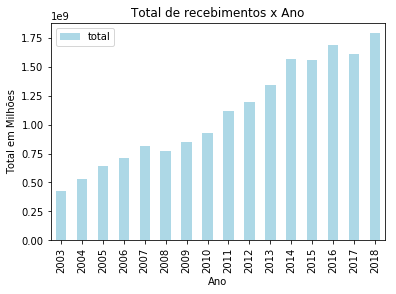

In [14]:
# Plotando gráfico: Total de recebimentos x Ano
ax = group_by_ano.plot(kind='bar',x='dt_ano',y='total',color='lightblue',title='Total de recebimentos x Ano')

ax.set_ylabel('Total em Milhões')
ax.set_xlabel('Ano')

plt.show()

In [15]:
# Informações sobre o desvio padrão, valores máximo e mínimo e os percentiles.
group_by_ano.describe()

,dt_ano,total
count,16.000000,1.600000e+01
mean,2010.500000,1.096098e+09
std,4.760952,4.466808e+08
min,2003.000000,4.269491e+08
25%,2006.750000,7.600471e+08
50%,2010.500000,1.019998e+09
75%,2014.250000,1.559869e+09
max,2018.000000,1.787108e+09


In [16]:
##############################################
# 2. Quais os valores recebidos por mês/ano? #
##############################################

# Criar novo dataframe apenas com os dados que importam
group_by_mes_ano = pref_mun_joao_pessoa.drop(columns=['cd_ugestora','de_ugestora','cd_receitaorcug','de_receitaorcug','tp_atualizacaoreceita','de_atualizacaoreceita','dt_ano'])
group_by_mes_ano.head()

,vl_lancamentoOrc,dt_mesano
486833,702074.41,2004-01-01
486834,495731.36,2004-02-01
486835,684563.07,2004-03-01
486836,504136.72,2004-04-01
486837,580640.06,2004-05-01


In [17]:
# Convertendo a coluna Mês/Ano em Datetime
# group_by_mes_ano['dt_mesano'] = pd.to_datetime(group_by_mes_ano['dt_mesano'], format='%m%Y')

# Agrupar e calcular a soma da coluna vl_lancamentoOrc
group_by_mes_ano['total'] = group_by_mes_ano.groupby('dt_mesano').transform('sum')
group_by_mes_ano = group_by_mes_ano.drop(columns=['vl_lancamentoOrc'])

In [18]:
# Removendo duplicatas
group_by_mes_ano.drop_duplicates(keep='first', inplace=True)
group_by_mes_ano.sort_values(by=['dt_mesano'],ascending=True,inplace=True)

In [19]:
# group_by_mes_ano.to_csv(r'group_by_mes_ano.csv',header=True,index=False,sep='|')
group_by_mes_ano.set_index('dt_mesano',inplace=True)
group_by_mes_ano.head()

,total
dt_mesano,
2003-01-01,46923205.80
2003-02-01,31463697.81
2003-03-01,34147830.15
2003-04-01,29138516.65
2003-05-01,38139457.19


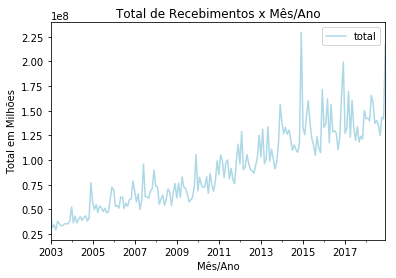

In [20]:
# Plotando gráfico: Total de recebimentos x Mês/Ano
ax = group_by_mes_ano.plot(kind='line',color='lightblue',title='Total de Recebimentos x Mês/Ano')

ax.set_ylabel('Total em Milhões')
ax.set_xlabel('Mês/Ano')

plt.show()

In [21]:
# Dados estatísticos
group_by_mes_ano.describe()

,total
count,1.920000e+02
mean,9.134154e+07
std,3.953522e+07
min,2.913852e+07
25%,6.025553e+07
50%,8.585041e+07
75%,1.231781e+08
max,2.294779e+08


In [22]:
quantile_1 = em_reais(valor=6.025553e+07)
quantile_2 = em_reais(valor=8.585041e+07)
quantile_3 = em_reais(valor=1.231781e+08)

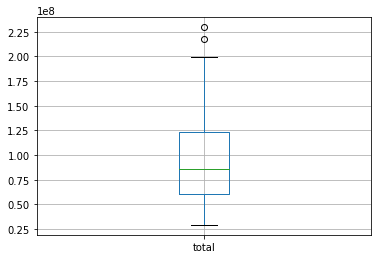

In [23]:
# Gráfico Bloxplot com os quartis, outliers, valores mínimos e máximos (desconsiderando os outliers)
group_by_mes_ano.boxplot()

In [24]:
group_by_mes_ano.total.autocorr()

0.8504240316671062

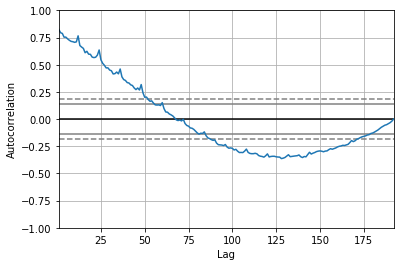

In [25]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(group_by_mes_ano.total)

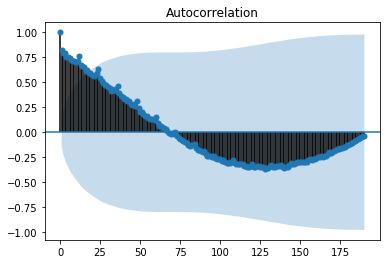

In [26]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(group_by_mes_ano.values.squeeze(), lags=190)
plt.show()

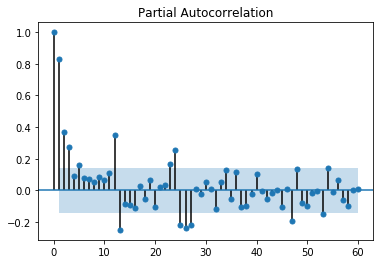

In [27]:
sm.graphics.tsa.plot_pacf(group_by_mes_ano.values.squeeze(), lags=60)
plt.show()

In [ ]:
# Plotar esse mesmo gráfico num bloxplot, plotando os ciclos
# Em R -> boxplot(AirPassengers~cycle(AirPassengers)) para ajudar a identificar a sazonalidade no ciclo.
# ACF - Auto correlation factor, mostra se o gráfico é estacionário; Se houver uma queda, ela indica se a série
# é estacionária, se ocilar não é;
# Partial ACF -> Vai mostrar os picos dentro da séria

# Testar se a nova série é estacionária, rodar o teste ADF (Augmented Dickey-Fuller Test);

# Nesse gráfico mostra
# - Uma tendência positiva, mostrando uma séria temporal crescente;
# - Isso demostra uma série não estacionária;
# - Mostra uma aparente sazonalidade com uma variação relevante nos anos de 2015 e 2017;
# - Deve-se, portanto, calcular o ruído para ver se a média dessa ocilação positiva e negativa tende a 0;
# - Seve-se também aplicar técnicas para estacionar a série;

# - Para séries não estacionárias, no modelo ARIMA, utilizar 1 no nível de autoregressão já seria o suficiente;
'''
Etapas

- Tornar a séria estacionária - Por diferenciação
- Controlar a variação (por transformação logarítmica, a mais simples)
- Determinar se os termos autorregressivos (AR) ou de médias móveis (MA) são necessários
- Teste do Modelo, Menor AIC
- Analisar os resíduos estacionários, com média zero e variância constante = Modelo correto
'''